# Chapter 04: Vector Applications

## Concepts

In [97]:
import numpy as np
from scipy import spatial
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import time

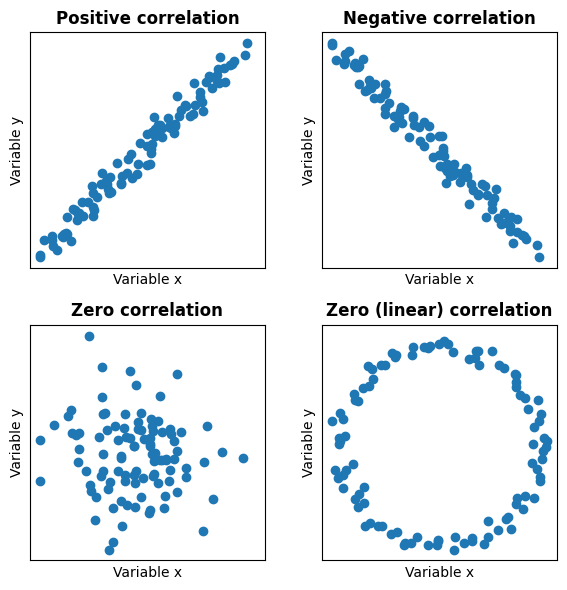

In [18]:
N = 100

# Function to setup each subplot
def setup_subplot(ax, x, y, title):
    ax.plot(x, y, 'o', 'blue')
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Variable x')
    ax.set_ylabel('Variable y')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('square')

# Set up figure
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

# Generate data for positive & negative correlation
x = np.linspace(0, 20, N) + np.random.randn(N)
y = x + np.random.randn(N)

# Positive correlation
setup_subplot(axs[0, 0], x, y, 'Positive correlation')

# Negative correlation
setup_subplot(axs[0, 1], x, -y, 'Negative correlation')

# Zero correlation, part 1
zero_x1 = np.random.randn(N)
zero_y1 = np.random.randn(N)
setup_subplot(axs[1, 0], zero_x1, zero_y1, 'Zero correlation')

# Zero (linear) correlation, part 2
theta = np.linspace(0, 2 * np.pi, N)
zero_x2 = np.cos(theta) + np.random.randn(N) / 20
zero_y2 = np.sin(theta) + np.random.randn(N) / 20
setup_subplot(axs[1, 1], zero_x2, zero_y2, 'Zero (linear) correlation')

plt.tight_layout()
plt.show()

## Code Exercises

In [85]:
# Exercise 4-1 (Pearson Correlation and Cosine Similarity)

# Create random vectors
vector_a = np.random.randn(10)
vector_b = np.random.randn(10)

# Calculate Pearson Correlation
def calculate_correlation(vector_a, vector_b):
    """Calculates the pearson correlation of two vectors"""
    vector_a_diff  = vector_a - np.mean(vector_a)
    vector_b_diff  = vector_b - np.mean(vector_b)
    numerator = np.dot(vector_a_diff, vector_b_diff)
    denominator = np.linalg.norm(vector_a_diff) * np.linalg.norm(vector_b_diff)
    return numerator / denominator

# Calculate Cosine Similarity
def calculate_cosine_similarity(vector_a, vector_b):
    """Calculates the cosine similarity of two vectors"""
    numerator = np.dot(vector_a, vector_b)
    denominator = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    return numerator / denominator

# Create formula for calculating both correlation and cos sim
def get_correlation_cos_sim(vector_a, vector_b):
    correlation = calculate_correlation(vector_a, vector_b)
    cosine_similarity = calculate_cosine_similarity(vector_a, vector_b)
    return correlation, cosine_similarity

# Validate results
correlation, cosine_similarity =  get_correlation_cos_sim(vector_a, vector_b)
true_correlation = np.corrcoef(vector_a, vector_b)[1,0]
true_cosine_similarity = 1- spatial.distance.cosine(vector_a, vector_b)

print(round(correlation, 5) == round(true_correlation, 5))
print(round(cosine_similarity, 5) == round(true_cosine_similarity, 5))

# Check to see if results are the same for Pearson's and Cosine similarity when vectors are mean centered
vector_a_diff = vector_a - np.mean(vector_a)
vector_b_diff = vector_b - np.mean(vector_b)
correlation, cosine_similarity =  get_correlation_cos_sim(vector_a_diff, vector_b_diff)
print(round(correlation, 5) == round(cosine_similarity, 5))

True
True
True


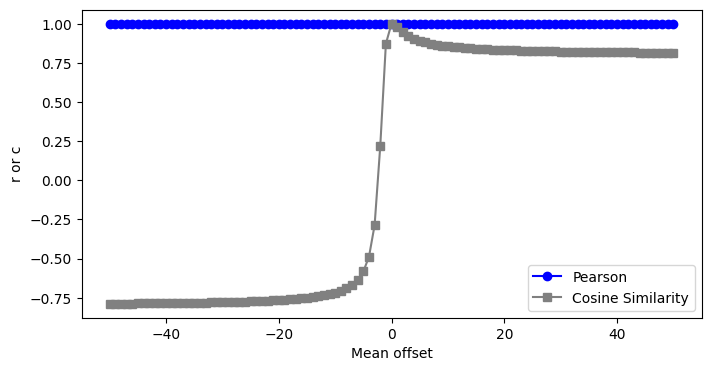

In [90]:
# Exercise 4-2 (Mean offset affect on Correlation and Cosine Similarity)

vector_a = np.array([i for i in range(4)])
offsets = np.array([i for i in range(-50,51)])

# Create zeros vector for storing the results
results = np.zeros((len(offsets),2))

# run the simulation!
for i in range(len(offsets)):
    results[i,:] = get_correlation_cos_sim(vector_a, vector_a+offsets[i])


# plot the results!
plt.figure(figsize=(8,4))
h = plt.plot(offsets,results)
h[0].set_color('blue')
h[0].set_marker('o')
h[1].set_color('grey')
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine Similarity'])
plt.show()

In [93]:
# Exercise 4-3 (Scipy implementation of Pearson Correlation)
??pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided')
Source:   
def pearsonr(x, y, *, alternative='two-sided'):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an uncorrelated system
    producing da

In [125]:
# Exercise 4-4 (Speed comparison of numpy correlation function and our own implementation)

iterations = 1000

def calc_runtime(correl_func):
    """Calculate the runtime for 1k iteration of correlation function."""
    start = time.time()
    for i in range(iterations):
        vector_a, vector_b = np.random.randn(2, 500)
        correl_func(vector_a, vector_b)
    end = time.time()
    return end - start

my_func_runtime = calc_runtime(calculate_correlation)
np_func_runtime = calc_runtime(np.corrcoef)

print(f"Runtime for my correlation calculation implementation: {my_func_runtime}")
print(f"Runtime for numpy correlation calculation implementation: {np_func_runtime}")

runtime_pct_diff = (np_func_runtime - my_func_runtime) / my_func_runtime
print(f"My implementation is {runtime_pct_diff:.2%} faster than numpy's implementation for 1K comparisons of 500 dim vectors.")

Runtime for my correlation calculation implementation: 0.08756089210510254
Runtime for numpy correlation calculation implementation: 0.13103485107421875
My implementation is 49.65% faster than numpy's implementation for 1K comparisons of 500 dim vectors.


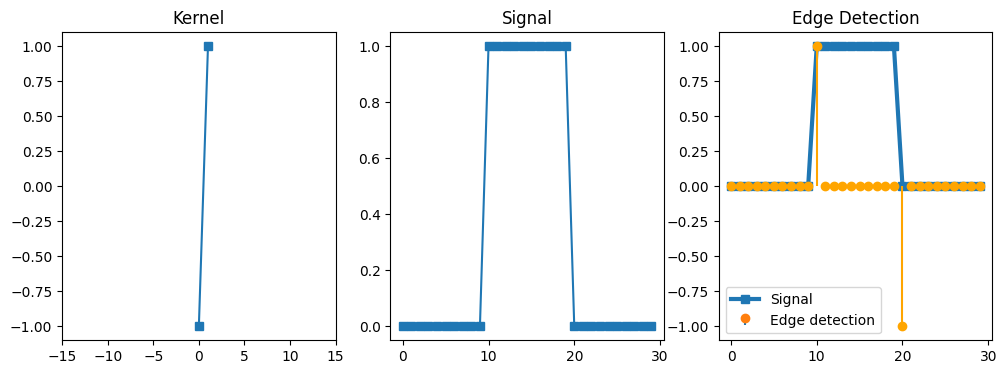

In [153]:
# Exercise 4-5 (Edge Detection via Time Series Filtering)

# Create our kernel
kernel = np.array([-1, 1])

# Create our signal
signal = np.full(30, 0)
signal[10:20] = 1

# Edge detection via dot products
featureMap = np.zeros(len(signal))
for i in range(1,len(signal)-1):
  featureMap[i] = np.dot(kernel,signal[t-1:t+1])

# Create Plot
_, axis = plt.subplots(1,3,figsize=(12,4))
axis[0].plot(kernel,'s-')
axis[0].set_title('Kernel')
axis[0].set_xlim([-15,15])

axis[1].plot(signal,'s-')
axis[1].set_title('Signal')

axis[2].plot(signal,'s-',label='Signal',linewidth=3)
axis[2].set_title('Edge Detection')
markers, stemlines, _ = axis[2].stem(range(len(featureMap)),featureMap,
                                  basefmt=' ',linefmt='',markerfmt='o',
                                  label='Edge detection')

axis[2].legend()
plt.setp(stemlines,'color', "orange")
plt.setp(markers,'color', "orange")

plt.show()

In [ ]:
# Exercise 4-6 (Time Series Filtering modified)

In [ ]:
# Exercise 4-7 (Time Series Filtering modified, again)

In [ ]:
# Exercise 4-8 (K-means clustering)

In [ ]:
# Exercise 4-9 (K-means clustering modified)